In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
dataframeTrain = pd.read_csv("titanic/train.csv")
dataframeTest = pd.read_csv("titanic/test.csv")

In [13]:
dataframeTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
dataframeTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
dataframeTrain['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Examine Missing Values

In [15]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
missing_values = missing_values_table(dataframeTrain)
missing_values.head(20)

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


# Column Types

In [16]:
dataframeTrain.dtypes.value_counts()

object     5
int64      5
float64    2
dtype: int64

In [17]:
# Number of unique classes in each object column
dataframeTrain.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

# Label Encoding and One Hot Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in dataframeTrain:
    if dataframeTrain[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(dataframeTrain[col].unique())) <= 2:
            # Train on the training data
            le.fit(dataframeTrain[col])
            # Transform both training and testing data
            dataframeTrain[col] = le.transform(dataframeTrain[col])
            dataframeTest[col] = le.transform(dataframeTest[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

1 columns were label encoded.


In [12]:
y = dataframeTrain['Survived']

features = ['Pclass', 'SibSp', 'Parch', 'Embarked']
X = pd.get_dummies(dataframeTrain[features])
X_test = pd.get_dummies(dataframeTest[features])

print("X shape ", str(X.shape))

X shape  (891, 6)


In [19]:
correlation = dataframeTrain.corr()['Survived'].sort_values()
print(correlation)

Sex           -0.543351
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64


/home/jaggu/PycharmProjects/untitled/tfvenv/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jaggu/PycharmProjects/untitled/tfvenv/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


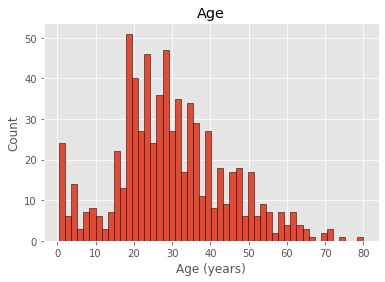

In [20]:
from matplotlib import style
style.use('ggplot')
plt.hist(dataframeTrain['Age'], edgecolor = 'k', bins = 50)
plt.title('Age'); plt.xlabel('Age (years)'); plt.ylabel('Count');

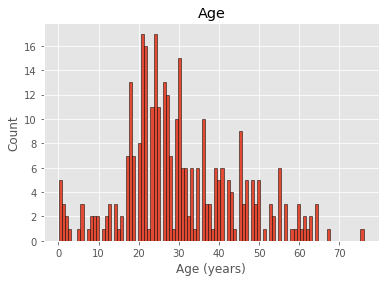

In [21]:
plt.hist(dataframeTest['Age'], edgecolor = 'k', bins = 100)
plt.title('Age');plt.xlabel('Age (years)');plt.ylabel('Count');

29.69911764705882
14.516321150817316
28.359287054409005


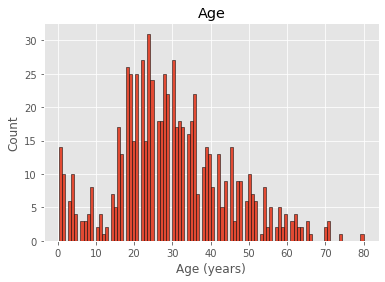

In [27]:
import math
age_List = dataframeTrain[['Age', 'Survived']].values
mean_age = np.array([age for age, survived in age_List if math.isnan(age) == False])
# print(mean_age)
print(mean_age.mean())
print(mean_age.std())
plt.hist(mean_age, edgecolor = 'k', bins = 100)
plt.title('Age');plt.xlabel('Age (years)');plt.ylabel('Count');

age_cat = np.array([age for age in mean_age if age >= 15 and age <= 45])
print(age_cat.mean())

In [28]:
dataframeTrain['Age'].fillna(28, inplace=True)

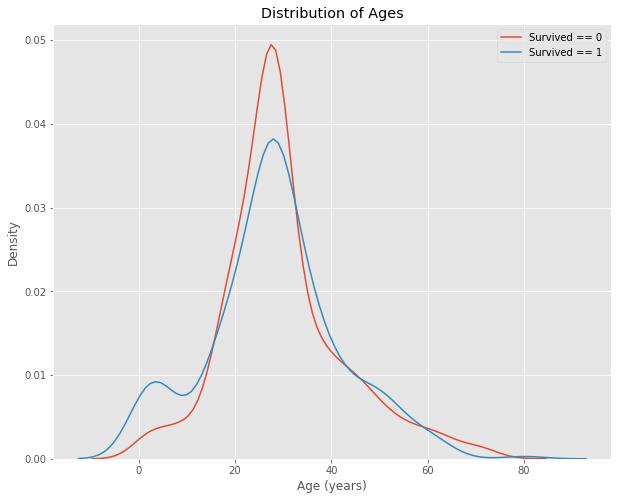

In [29]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(dataframeTrain.loc[dataframeTrain['Survived'] == 0, 'Age'], label = 'Survived == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(dataframeTrain.loc[dataframeTrain['Survived'] == 1, 'Age'], label = 'Survived == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [31]:
# Bin the age data
dataframeTrain['Age_BINNED'] = pd.cut(dataframeTrain['Age'], bins = np.linspace(0, 80, num = 20))
dataframeTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_BINNED
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,"(21.053, 25.263]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,"(37.895, 42.105]"
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(25.263, 29.474]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,"(33.684, 37.895]"
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,"(33.684, 37.895]"


In [32]:
dataframeTrain['Age_BINNED'].value_counts()

(25.263, 29.474]    260
(16.842, 21.053]    104
(21.053, 25.263]     97
(29.474, 33.684]     79
(33.684, 37.895]     63
(37.895, 42.105]     59
(0.0, 4.211]         40
(46.316, 50.526]     34
(42.105, 46.316]     31
(12.632, 16.842]     31
(50.526, 54.737]     22
(58.947, 63.158]     15
(8.421, 12.632]      15
(54.737, 58.947]     14
(4.211, 8.421]       14
(63.158, 67.368]      6
(67.368, 71.579]      5
(71.579, 75.789]      1
(75.789, 80.0]        1
Name: Age_BINNED, dtype: int64

In [33]:
ext_data = dataframeTrain[['Survived', 'Age', 'Sex', 'Pclass', 'Fare']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,Survived,Age,Sex,Pclass,Fare
Survived,1.000000,-0.064910,-0.543351,-0.338481,0.257307
Age,-0.064910,1.000000,0.081163,-0.339898,0.096688
Sex,-0.543351,0.081163,1.000000,0.131900,-0.182333
Pclass,-0.338481,-0.339898,0.131900,1.000000,-0.549500
Fare,0.257307,0.096688,-0.182333,-0.549500,1.000000


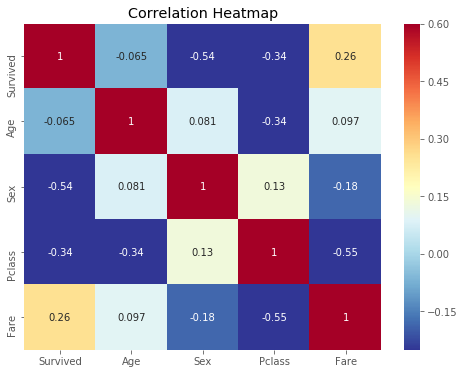

In [34]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

/home/jaggu/PycharmProjects/untitled/tfvenv/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


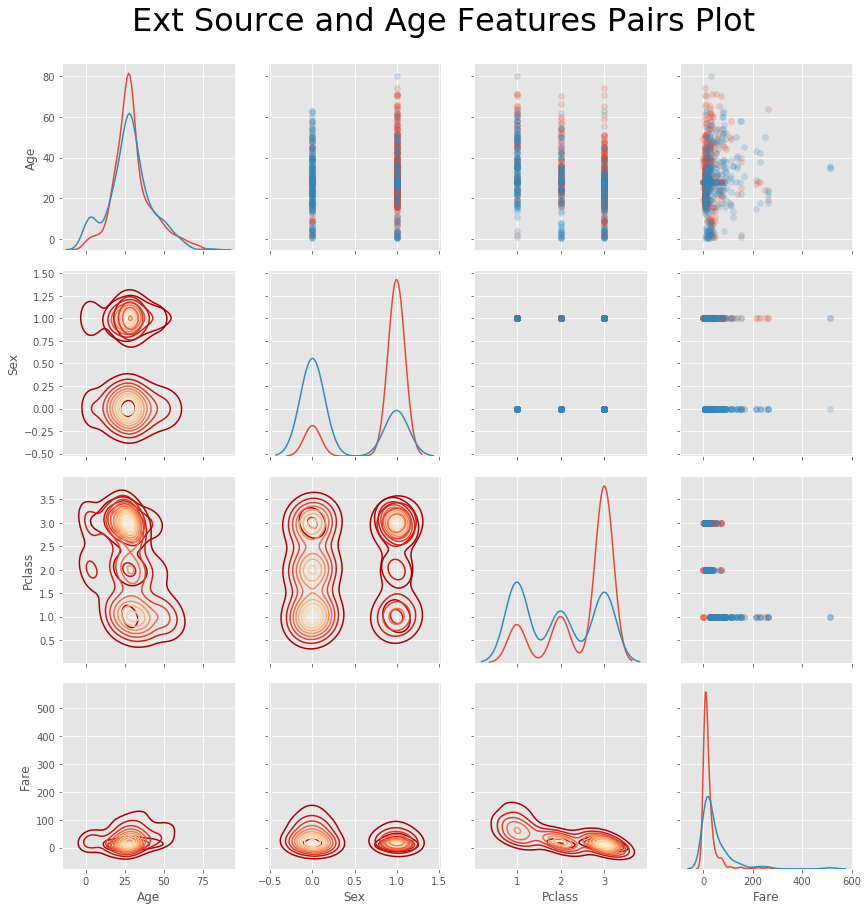

In [35]:
from matplotlib import style
style.use('ggplot')
# Copy the data for plotting
plot_data = ext_data.copy()

# Add in the age of the client in years
# plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
# plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'Survived', 
                    vars = [x for x in list(plot_data.columns) if x != 'Survived'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

# Feature Engineering

Polynomial Features

In [36]:
# Make a new dataframe for polynomial features
poly_features = dataframeTrain[['Age', 'Sex', 'Pclass', 'Fare', 'SibSp', 'Parch']]
poly_features_test = dataframeTest[['Age', 'Sex', 'Pclass', 'Fare', 'SibSp', 'Parch']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (891, 84)


In [37]:
poly_transformer.get_feature_names(input_features = ['Age', 'Sex', 'Pclass', 'Fare', 'SibSp', 'Parch'])

['1',
 'Age',
 'Sex',
 'Pclass',
 'Fare',
 'SibSp',
 'Parch',
 'Age^2',
 'Age Sex',
 'Age Pclass',
 'Age Fare',
 'Age SibSp',
 'Age Parch',
 'Sex^2',
 'Sex Pclass',
 'Sex Fare',
 'Sex SibSp',
 'Sex Parch',
 'Pclass^2',
 'Pclass Fare',
 'Pclass SibSp',
 'Pclass Parch',
 'Fare^2',
 'Fare SibSp',
 'Fare Parch',
 'SibSp^2',
 'SibSp Parch',
 'Parch^2',
 'Age^3',
 'Age^2 Sex',
 'Age^2 Pclass',
 'Age^2 Fare',
 'Age^2 SibSp',
 'Age^2 Parch',
 'Age Sex^2',
 'Age Sex Pclass',
 'Age Sex Fare',
 'Age Sex SibSp',
 'Age Sex Parch',
 'Age Pclass^2',
 'Age Pclass Fare',
 'Age Pclass SibSp',
 'Age Pclass Parch',
 'Age Fare^2',
 'Age Fare SibSp',
 'Age Fare Parch',
 'Age SibSp^2',
 'Age SibSp Parch',
 'Age Parch^2',
 'Sex^3',
 'Sex^2 Pclass',
 'Sex^2 Fare',
 'Sex^2 SibSp',
 'Sex^2 Parch',
 'Sex Pclass^2',
 'Sex Pclass Fare',
 'Sex Pclass SibSp',
 'Sex Pclass Parch',
 'Sex Fare^2',
 'Sex Fare SibSp',
 'Sex Fare Parch',
 'Sex SibSp^2',
 'Sex SibSp Parch',
 'Sex Parch^2',
 'Pclass^3',
 'Pclass^2 Fare',
 'P

In [38]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['Age', 'Sex', 'Pclass', 'Fare', 'SibSp', 'Parch']))

# Add in the target
poly_features['TARGET'] = dataframeTrain['Survived']

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

Sex^3            -0.543351
Sex              -0.543351
Sex^2            -0.543351
Sex^2 Pclass     -0.542493
Sex Pclass       -0.542493
Age Sex Pclass   -0.531335
Sex Pclass^2     -0.495971
Age Sex^2        -0.478063
Age Sex          -0.478063
Age Pclass^2     -0.354335
Name: TARGET, dtype: float64
Pclass Fare    0.183627
Age Fare       0.222430
Fare           0.257307
TARGET         1.000000
1                   NaN
Name: TARGET, dtype: float64


In [41]:
dataEmbarked = dataframeTrain[['Survived', 'Embarked']]
dataframeTrain['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [43]:
dataframeTrain['Embarked'].fillna('S', inplace=True)
dataframeTest['Embarked'].fillna('S', inplace=True)

In [44]:
dataEmbarked = dataframeTrain['Embarked']
XEmbarkedTrain = pd.get_dummies(dataEmbarked)
XEmbarkedTest = pd.get_dummies(dataframeTest['Embarked'])

In [46]:
dataframeTrain = pd.concat([dataframeTrain, XEmbarkedTrain], axis=1, sort=False)
dataframeTest = pd.concat([dataframeTest, XEmbarkedTest], axis=1, sort=False)

In [47]:
dataframeTrain['Sex_Pclass'] = dataframeTrain['Sex']*dataframeTrain['Pclass']
dataframeTest['Sex_Pclass'] = dataframeTest['Sex']*dataframeTest['Pclass']

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 50, random_state = 50, verbose = 1, n_jobs = -1)

In [54]:
dataTrainLabels = dataframeTrain['Survived']
dataTestPassenger = dataframeTest['PassengerId']
dataTrain = dataframeTrain.drop(['PassengerId','Name', 'Survived', 'Ticket', 'Cabin', 'Embarked', 'Sex_Pclass', 'Age_BINNED'], axis=1)
dataTest = dataframeTest.drop(['PassengerId','Name', 'Ticket', 'Cabin', 'Embarked', 'Sex_Pclass'], axis=1)

In [60]:
dataTest['Age'].fillna(28, inplace=True)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
dataTrain = imputer.fit_transform(dataTrain)
dataTest = imputer.transform(dataTest)

features = ['Pclass', 'Age','Sex','SibSp','Parch','Fare','C','Q','S']
# Train on the training data
random_forest.fit(dataTrain, dataTrainLabels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(dataTest)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.2s finished


In [58]:
missing_values = missing_values_table(dataTest)
missing_values.head()

Your selected dataframe has 9 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Age,86,20.6
Fare,1,0.2


In [62]:
predictValue = random_forest.predict(dataTest)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [63]:
output = pd.DataFrame({'PassengerId': dataTestPassenger, 'Survived': predictValue})
output.to_csv('my_submission.csv', index=False)